In [2]:
from upsetplot import generate_counts
import pandas as pd

example = generate_counts()

example

cat0   cat1   cat2 
False  False  False      56
              True      283
       True   False    1279
              True     5882
True   False  False      24
              True       90
       True   False     429
              True     1957
Name: value, dtype: int64

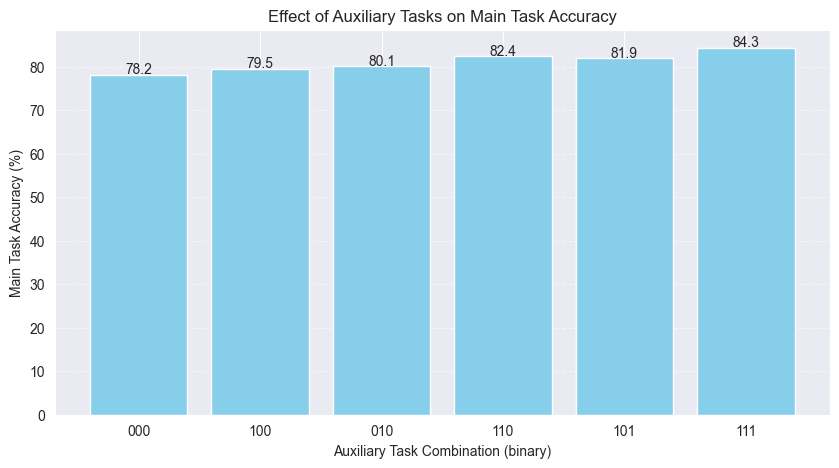

In [49]:
braak  = pd.read_csv("data/braak.csv")
print(braak)

C:\Users\limmi\Documents\Pytorch\venv\Lib\site-packages\upsetplot\data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
C:\Users\limmi\Documents\Pytorch\venv\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(

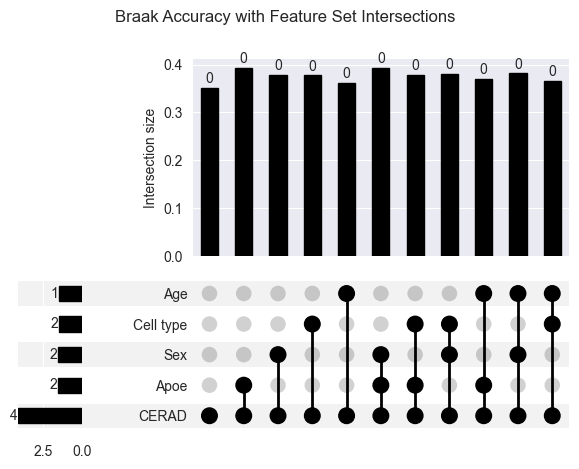

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# Load the CSV data
df = pd.read_csv("data/CERAD.csv")



# Create membership labels from boolean columns
feature_cols = ['CERAD', 'Age', 'Sex', 'Apoe', 'Cell type']
df['membership'] = df[feature_cols].apply(
    lambda row: [col for col in feature_cols if row[col]], axis=1
)

# Use from_memberships to build input for UpSet
upset_data = from_memberships(df['membership'], data=df['CERAD_acc'])
# upset_data["Braak_acc_std"] = df["Braak_acc_std"].values
# print(upset_data)

# Create UpSet plot with Braak acc as values and Braak acc std as error bars
fig = plt.figure(figsize=(10, 6))
up = UpSet(upset_data, show_counts=True, sort_by='degree')
# up.add_catplot(
#     kind='bar',
#     value='Braak_acc',
#     error_bars=df['Braak_acc_std'].values,  # Error bars
#     color='skyblue'
# )
up.plot(fig=fig)

plt.suptitle("Braak Accuracy with Feature Set Intersections")
plt.show()

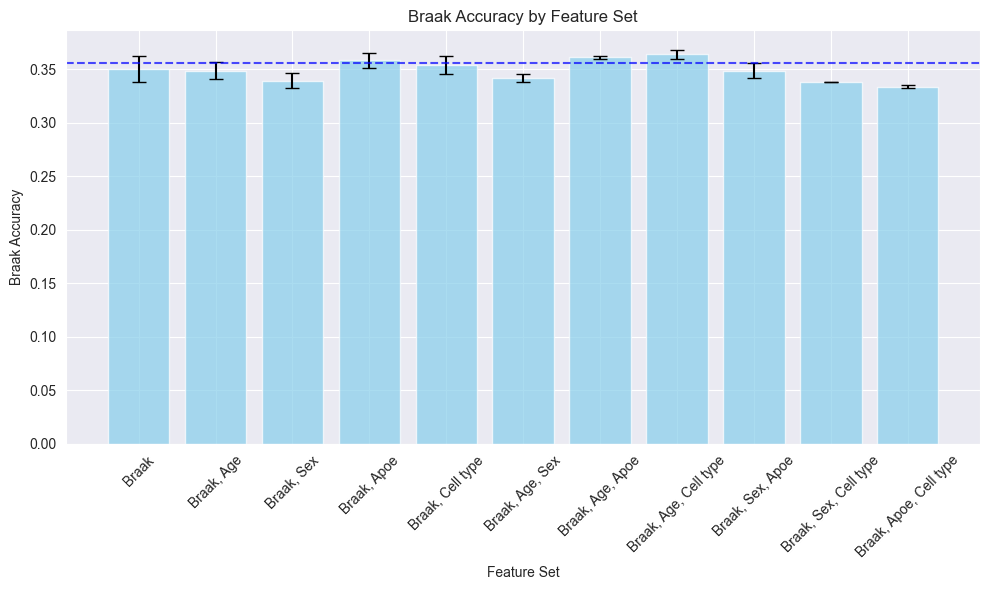

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data/braak.csv")
# Create membership labels from boolean columns
feature_cols = ['Braak', 'Age', 'Sex', 'Apoe', 'Cell type']
df['membership'] = df[feature_cols].apply(
    lambda row: [col for col in feature_cols if row[col]], axis=1
)
naiveBayes = 0.356


x = df['membership'].apply(lambda x: ', '.join(x))
y = df['Braak_acc']
std = df['Braak_acc_std']

plt.figure(figsize=(10, 6))
plt.bar(x, y, yerr=std, color='skyblue', capsize=5, alpha=0.7)
plt.xlabel('Feature Set')
plt.axhline(y=naiveBayes, color='b', linestyle='--', label='Naive Bayes Baseline', alpha=0.7)
plt.ylabel('Braak Accuracy')
plt.title('Braak Accuracy by Feature Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

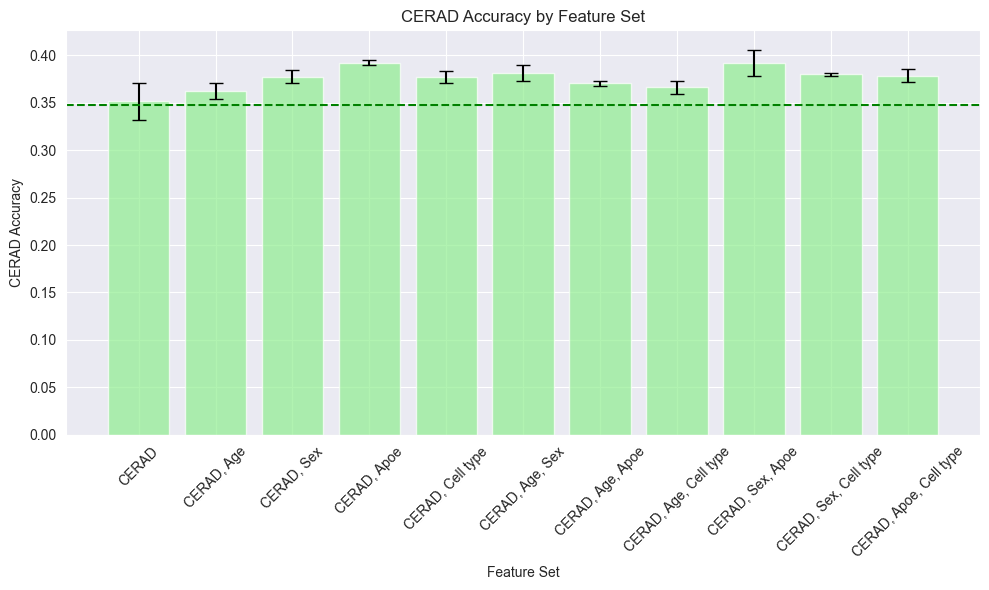

In [28]:
df = pd.read_csv("data/CERAD.csv")
# Create membership labels from boolean columns
feature_cols = ['CERAD', 'Age', 'Sex', 'Apoe', 'Cell type']
df['membership'] = df[feature_cols].apply(
    lambda row: [col for col in feature_cols if row[col]], axis=1
)
naiveBayes = 0.348


x = df['membership'].apply(lambda x: ', '.join(x))
y = df['CERAD_acc']
std = df['CERAD_acc_std']

plt.figure(figsize=(10, 6))
plt.bar(x, y, yerr=std, color='lightgreen', capsize=5, alpha=0.7)
plt.xlabel('Feature Set')
plt.axhline(y=naiveBayes, color='g', linestyle='--', label='Naive Bayes Baseline')
plt.ylabel('CERAD Accuracy')
plt.title('CERAD Accuracy by Feature Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

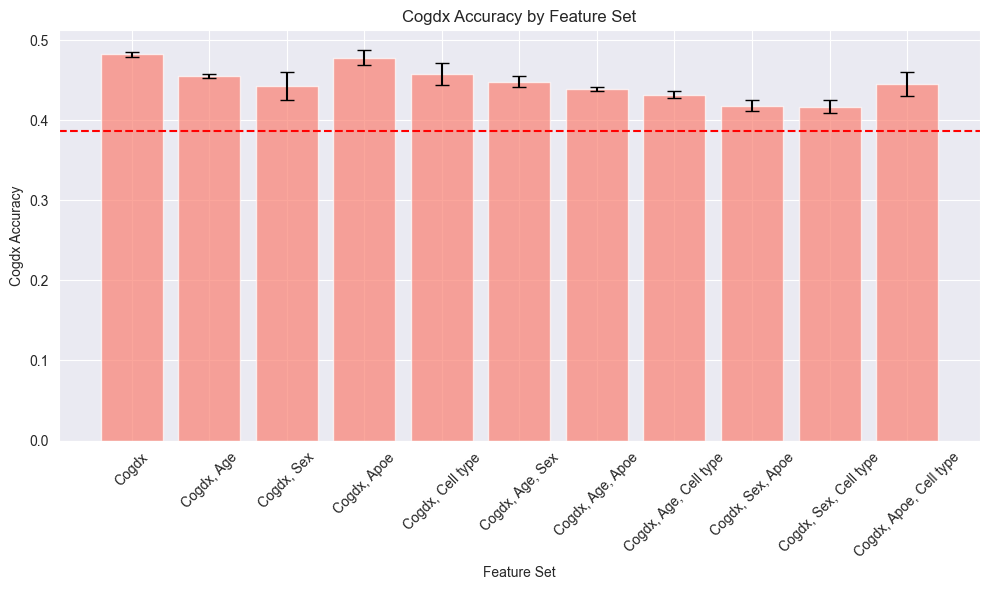

In [29]:

# make a bar plot of the Braak accuracy
df = pd.read_csv("data/cogdx.csv")
# Create membership labels from boolean columns
feature_cols = ['Cogdx', 'Age', 'Sex', 'Apoe', 'Cell type']
df['membership'] = df[feature_cols].apply(
    lambda row: [col for col in feature_cols if row[col]], axis=1
)
naiveBayes = 0.386


x = df['membership'].apply(lambda x: ', '.join(x))
y = df['Cogdx_acc']
std = df['Cogdx_acc_std']

plt.figure(figsize=(10, 6))
plt.bar(x, y, yerr=std, color='salmon', capsize=5, alpha=0.7)
plt.xlabel('Feature Set')
plt.axhline(y=naiveBayes, color='r', linestyle='--', label='Naive Bayes Baseline')
plt.ylabel('Cogdx Accuracy')
plt.title('Cogdx Accuracy by Feature Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
#cerad
y = [0.3513, 0.3761]
plt.figure(figsize=(8, 5))
plt.bar(x, y, color='skyblue')
plt.ylabel('Accuracy')
plt.xlabel('Cell Type')
plt.title('CERAD Accuracy by Cell Type')

In [7]:
from scipy.stats import ttest_rel
import numpy as np
Braakaccs = [0.3501, 0.3813, 0.3487, 0.3123, 0.3215]
BraakBaseline = 0.356
Ceradaccs = [0.3513, 0.3761, 0.3327, 0.3732, 0.3925]
CeradBaseline = 0.348
Cogdxaccs = [0.4822, 0.4494, 0.4693, 0.5013, 0.4033]
CogdxBaseline = 0.386

print(np.mean(Cogdxaccs))
print(np.std(Cogdxaccs))

normalizedBraak = [(x - BraakBaseline) / BraakBaseline for x in Braakaccs]
normalizedCerad = [(x - CeradBaseline) / CeradBaseline for x in Ceradaccs]
normalizedCogdx = [(x - CogdxBaseline) / CogdxBaseline for x in Cogdxaccs]
print("Normalized Braak:", normalizedBraak)
print("Normalized Cerad:", normalizedCerad)
print("Normalized Cogdx:", normalizedCogdx)
ttest_rel(normalizedBraak, normalizedCogdx)

# print(np.mean(Cogdxaccs))
# print(np.std(Cogdxaccs))

0.46110000000000007
0.03348498170822257
Normalized Braak: [-0.01657303370786506, 0.07106741573033705, -0.020505617977528017, -0.12275280898876394, -0.0969101123595505]
Normalized Cerad: [0.009482758620689728, 0.08074712643678165, -0.04396551724137926, 0.07241379310344828, 0.12787356321839094]
Normalized Cogdx: [0.24922279792746116, 0.16424870466321245, 0.21580310880829012, 0.2987046632124351, 0.04481865284974088]


TtestResult(statistic=np.float64(-4.080736256923391), pvalue=np.float64(0.015089306592896756), df=np.int64(4))

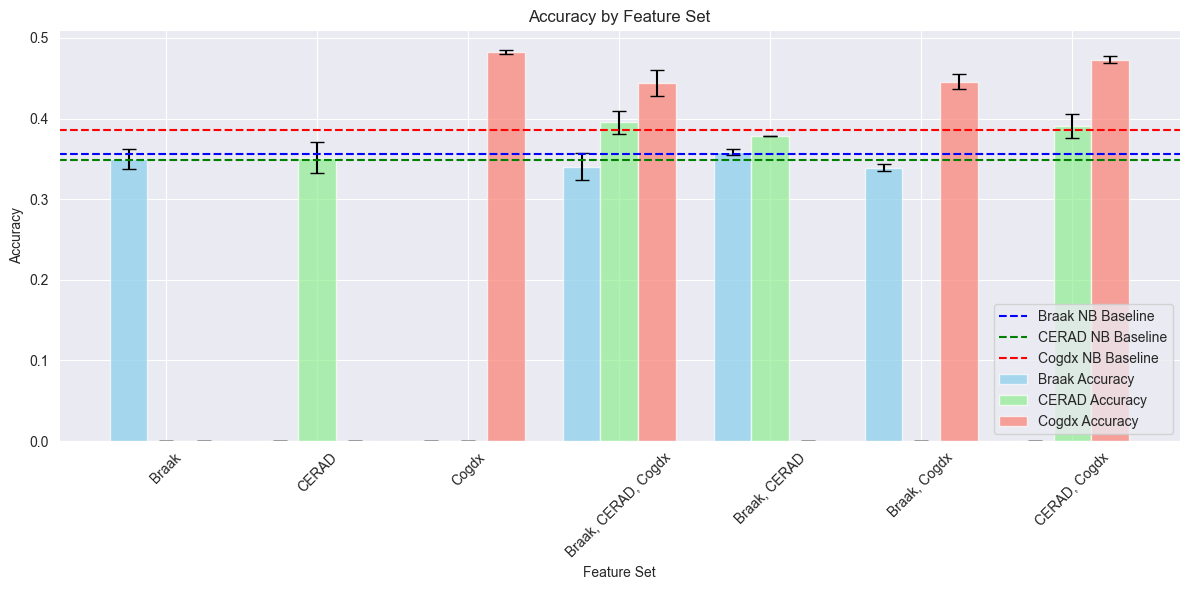

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV data
df = pd.read_csv("data/mains.csv")
df.fillna(0, inplace=True)

# Create membership labels
feature_cols = ['Braak', 'CERAD', 'Cogdx']
df['membership'] = df[feature_cols].apply(
    lambda row: ', '.join([col for col in feature_cols if row[col]]), axis=1
)

# Data
labels = df['membership']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

# Accuracy and std values
y1 = df['Braak acc']
std1 = df['Braak std']
y2 = df['CERAD acc']
std2 = df['CERAD std']
y3 = df['Cogdx acc']
std3 = df['Cogdx std']

# Baselines
BraakBaseline = 0.356
CeradBaseline = 0.348
CogdxBaseline = 0.386

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x - width, y1, width, yerr=std1, label='Braak Accuracy', color='skyblue', capsize=5, alpha=0.7)
plt.bar(x, y2, width, yerr=std2, label='CERAD Accuracy', color='lightgreen', capsize=5, alpha=0.7)
plt.bar(x + width, y3, width, yerr=std3, label='Cogdx Accuracy', color='salmon', capsize=5, alpha=0.7)

# Baseline lines
plt.axhline(y=BraakBaseline, color='b', linestyle='--', label='Braak NB Baseline')
plt.axhline(y=CeradBaseline, color='g', linestyle='--', label='CERAD NB Baseline')
plt.axhline(y=CogdxBaseline, color='r', linestyle='--', label='Cogdx NB Baseline')

# Labels and legend
plt.xlabel('Feature Set')
plt.ylabel('Accuracy')
plt.title('Accuracy by Feature Set')
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()




In [2]:
from scipy.stats import ttest_rel
base = [0.3513, 0.37326916, 0.3625324, 0.37604591, 0.3679378]
mtl = [0.3924, 0.3789337, 0.3625324, 0.3546094, 0.36801185]

ttest_rel(base, mtl)

TtestResult(statistic=np.float64(-0.5015908244452562), pvalue=np.float64(0.6423051191026101), df=np.int64(4))

                   braaksc   ceradsc     cogdx      msex  age_at_visit_max  \
braaksc           1.000000 -0.595450  0.408902 -0.155013          0.279017   
ceradsc          -0.595450  1.000000 -0.374425  0.121061         -0.170421   
cogdx             0.408902 -0.374425  1.000000 -0.023486          0.250420   
msex             -0.155013  0.121061 -0.023486  1.000000         -0.139928   
age_at_visit_max  0.279017 -0.170421  0.250420 -0.139928          1.000000   
apoe_genotype     0.227567 -0.274310  0.155277 -0.004317         -0.081658   

                  apoe_genotype  
braaksc                0.227567  
ceradsc               -0.274310  
cogdx                  0.155277  
msex                  -0.004317  
age_at_visit_max      -0.081658  
apoe_genotype          1.000000  


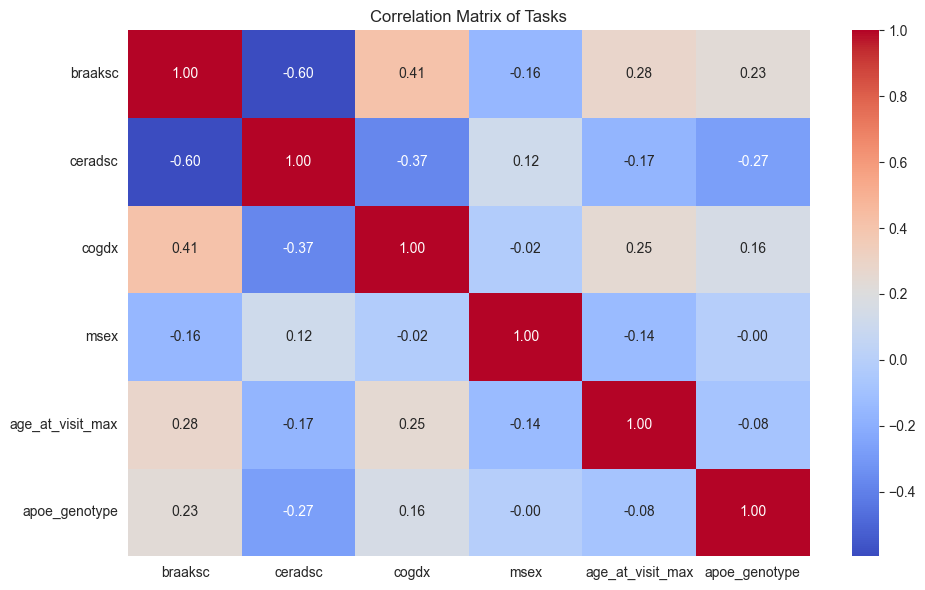

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

metadata = pd.read_csv("../data/rosmap/rosmap_clinical.csv")
columns = [
    "individualID", "braaksc", "ceradsc", "cogdx", "msex", "age_at_visit_max", "apoe_genotype", "pmi"
]

# columns2 = [
#     "individualID", "braaksc", "ceradsc", "age_at_visit_max"
# ]
# Select and clean relevant metadata
metadata_clean = metadata[columns].dropna()

# labels = []

# for ind in metadata_clean["individualID"]:
#     cogdx = metadata_clean[metadata_clean["individualID"] == ind]["cogdx"].values[0]
#     braaksc = metadata_clean[metadata_clean["individualID"] == ind]["braaksc"].values[0]
#     ceradsc = metadata_clean[metadata_clean["individualID"] == ind]["ceradsc"].values[0]
# 
#     if cogdx == 1 and braaksc <= 3 and ceradsc >= 3:
#         label = "CT"
#     elif cogdx == 4 and braaksc >= 4 and ceradsc <= 2:
#         label = "AD"
#     else:
#         label = "Other"
# 
#     labels.append(label)
# metadata_clean["AD"] = labels
# print("AD labels:", metadata_clean["AD"].value_counts())

# metadata_clean = metadata_clean[metadata_clean["AD"] != "Other"]
#
# metadata_clean["AD"] = metadata_clean["AD"].map({"CT": 0, "AD": 1})

# drop all the columns were cogdx = 6
metadata_clean = metadata_clean[metadata_clean["cogdx"] != 6]
#
# map the cogdx to an integer value
metadata_clean["cogdx"] = metadata_clean["cogdx"].astype(int) - 1



metadata_clean["ceradsc"] = metadata_clean["ceradsc"].astype(int) - 1

#metadata_clean["ceradsc"] = 3 - metadata_clean["ceradsc"]
#
# take only the samples were pmi < 12 hours
metadata_clean = metadata_clean[metadata_clean["pmi"] < 12]

# # bin the braaksc to 4 classes, 0-1-2, 3, 4, 5-6
metadata_clean["braaksc"] = metadata_clean["braaksc"].replace({0: 0, 1: 0, 2: 0, 3: 1, 4: 2, 5: 3, 6: 3})
#metadata_clean["ceradsc"] = metadata_clean["ceradsc"].replace({0: 0, 1: 1, 2: 2, 3: 2})
metadata_clean["cogdx"] = metadata_clean["cogdx"].replace({0: 0, 1: 1, 2: 1, 3: 2, 4: 2})

# # Map APOE genotypes to numeric categories
apoe_map = {
    22.0: 0,
    23.0: 1,
    24.0: 2,
    33.0: 3,
    34.0: 4,
    44.0: 5
}

metadata_clean["apoe_genotype"] = metadata_clean["apoe_genotype"].map(apoe_map)
#
# replace the 90+ sting values in age_at_visit_max with 90.0
metadata_clean["age_at_visit_max"] = metadata_clean["age_at_visit_max"].replace({"90+": 90.0})
# replace the strings in age_at_visit_max with their float parsed values
metadata_clean["age_at_visit_max"] = metadata_clean["age_at_visit_max"].astype(float)
# normalize the age_at_visit_max
metadata_clean["age_at_visit_max"] = (metadata_clean["age_at_visit_max"] - metadata_clean[
    "age_at_visit_max"].mean()) / metadata_clean["age_at_visit_max"].std()

metadata_clean = metadata_clean.drop(columns=["individualID", "pmi"])
# make corralation matrix
correlation_matrix = metadata_clean.corr()
# print the correlation matrix
print(correlation_matrix)
# plot the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Tasks")
plt.tight_layout()
plt.show()


In [4]:
STLtrainloss = [0.5718009463147709, 0.5257419766879243, 0.4915910695530222, 0.44483840330997926, 0.398164659822633, 0.3570468926436476, 0.32251795714313236, 0.29428557839673475, 0.27304461870014535, 0.25597432993234687, 0.24269404009186388, 0.23439944050281097, 0.2229521491440774, 0.21892642855442404, 0.2122039985306914, 0.2068041029636397, 0.2019321646364763, 0.20511164485937317, 0.19951672878948884, 0.19490430985091772, 0.1952616720887124, 0.19008187598151494, 0.1879619830887151, 0.18586280123744808, 0.18764344092803265, 0.1847431287253549, 0.1850152144431395, 0.18300102781462346, 0.1837154247295574, 0.18138092894182786, 0.17991710192698387, 0.17892626265555822, 0.17868109232416002, 0.1787398268571691, 0.1802438538075839, 0.17633156142876594, 0.1763338553162111, 0.17936743866929755, 0.177213561618133, 0.17371368536864393, 0.17368467329973963, 0.1762091982689251, 0.17580431201505742, 0.17510989720409664, 0.17449213713659795]
STLtestloss = [0.6821554332971573, 0.7109551779031753, 0.7639823548793793, 0.7785179806947709, 0.8822887553572655, 0.8832088621258736, 0.9219692127704621, 0.9607578300237656, 1.022547312617302, 1.0625843654870988, 1.0486539552211762, 1.088429841041565, 1.0996387861967087, 1.102819738984108, 1.0964971110224724, 1.1258843084573746, 1.1079913561344146, 1.1412396692037583, 1.1648197022676468, 1.1256084096431733, 1.172718134045601, 1.137694781422615, 1.1930549492835998, 1.1670091197490693, 1.169667174935341, 1.175004274368286, 1.2215845952033997, 1.193583671092987, 1.1843680725097656, 1.2108226888179778, 1.174596866607666, 1.190158549785614, 1.2499697954654694, 1.193452099084854, 1.1864805673360825, 1.2354948425292969, 1.1928342914581298, 1.181831453204155, 1.2331482756137848, 1.1838887602090835, 1.2209089603424073, 1.2312482475042343, 1.2286986085176468, 1.242040668964386, 1.1913422706127166]

MTLtrainloss = [0.5466740709817123, 0.5064216720783997, 0.47370300352312544, 0.4328446181193483, 0.3991360511769351, 0.37033452592480365, 0.3500743315308569, 0.330123098334807, 0.3184175889784189, 0.30628131494676, 0.29745543731837093, 0.2918764254979023, 0.28499427072589717, 0.2777085860689829, 0.2746283007985393, 0.27163889003139097, 0.2695939261914604, 0.2666618128019819, 0.26257485324105234, 0.26041242095521555, 0.2591079838688055, 0.2591545976192998, 0.2562996269707085, 0.2560567691009206, 0.25520474967471357, 0.254872222795789, 0.251491921116278, 0.25223854885190006, 0.2505041181356432, 0.2488968655858311, 0.24628026907370962, 0.24748327830883815, 0.24609223001634528, 0.24577322325116957, 0.24602292743827373, 0.24667230072376242, 0.24418525027694013, 0.24372719070126245, 0.24366626859167734, 0.24442109700365713, 0.2437443718868481, 0.24012078802942968, 0.24321277992274098, 0.24167162941308198, 0.23988085318381208, 0.24235794967126012, 0.24212320571198767, 0.24040543922188506, 0.2393741311354632, 0.24009347459223912, 0.2382362340811306, 0.23979838410111173, 0.23878377628730738, 0.23703252052973867, 0.23835622760542632, 0.2362159350540497, 0.23912423493695206, 0.23637495827361843, 0.23804679847194016, 0.23776085089476418]

MTLtestloss = [0.7334409438006513, 0.7144851746322872, 0.7850547767168766, 0.7992316907322085, 0.8172540663330404, 0.875011045116562, 0.8830299663382608, 0.9183762642043131, 0.9221253455490679, 0.9196175087813858, 0.9348527660912221, 0.9750266050970232, 0.9421048124094267, 1.017107077949756, 0.9771600863686553, 1.0397642846848514, 0.9944888348649213, 0.9740411112974355, 0.989931189799094, 1.0084337725027188, 1.0178135397197965, 1.0040007114141911, 0.9938757004770072, 1.0585292239446897, 1.0217584962243433, 1.0309068596175126, 1.025747568489195, 0.9813084862790666, 1.0044562323941841, 1.0366717459516481, 1.0240685143717774, 1.0765454978556246, 1.0523056806744755, 1.0612134464957692, 1.0307769277342804, 1.0534604272326908, 1.0452803584772188, 1.0358180778252113, 1.0534730291849859, 1.0604255493428256, 1.0366552492251266, 1.045834977414694, 1.0234142078741177, 1.0703799973602768, 1.037960503149677, 1.0820824176341564, 1.048290147706195, 1.065391802707234, 1.0216483650309545, 1.1080979911593702, 1.0514518897812646, 1.1041178187808476, 1.1004046318498817, 1.0762123343375352, 1.0690158522343851, 1.08092150723075, 1.0735202245078646, 1.0912760787450515, 1.073270757321839, 1.0730745964222126]

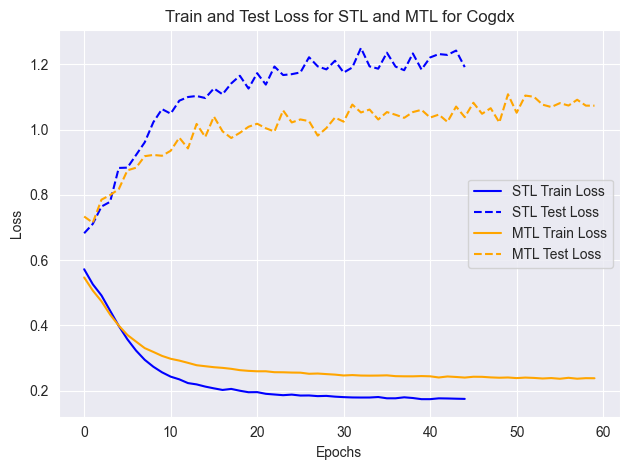

In [6]:

import matplotlib.pyplot as plt
import numpy as np

plt.plot(STLtrainloss, label='STL Train Loss', color='blue')
plt.plot(STLtestloss, label='STL Test Loss', color='blue', linestyle='--')
plt.plot(MTLtrainloss, label='MTL Train Loss', color='orange')
plt.plot(MTLtestloss, label='MTL Test Loss', color='orange', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss for STL and MTL for Cogdx')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()